In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [29]:
df_final = pd.read_csv('data/processed/2010-22_reduced.csv')
df_final.head()
# drop if cancelled
print(df_final.shape)
df_final.drop(df_final[df_final['CANCELLED'] == 1].index, inplace=True)
print(df_final.shape)
df_final['ARR_DELAY'] = pd.to_numeric(df_final['ARR_DELAY'], errors='coerce')
df_final['DEP_DELAY'] = pd.to_numeric(df_final['DEP_DELAY'], errors='coerce')
df_final['DISTANCE'] = pd.to_numeric(df_final['DISTANCE'], errors='coerce')
df_final.drop('CANCELLED', axis=1, inplace=True)
# cat codes
df_final['ORIGIN'] = df_final['ORIGIN'].astype('category').cat.codes
df_final['DEST'] = df_final['DEST'].astype('category').cat.codes
df_final['OP_CARRIER'] = df_final['OP_CARRIER'].astype('category').cat.codes
df_final['FL_DATE'] = df_final['FL_DATE'].astype('category').cat.codes

C:\Users\Vartika\AppData\Local\Temp\ipykernel_2028\3997554689.py:1: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv('data/processed/2010-22_reduced.csv')


(76169, 8)
(76169, 8)


<Axes: >

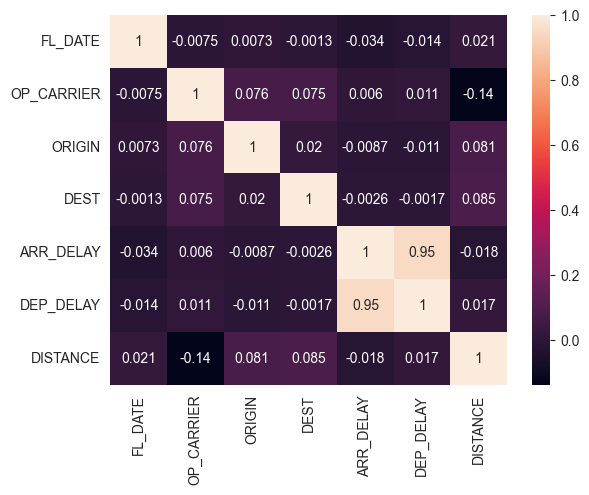

In [30]:
sns.heatmap(df_final.corr(), annot=True)

<Axes: xlabel='DEP_DELAY', ylabel='ARR_DELAY'>

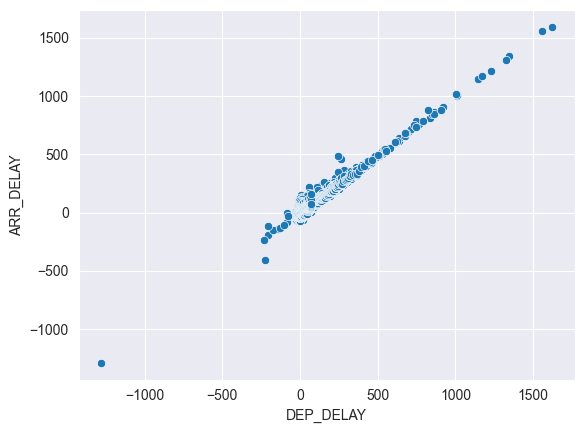

In [31]:
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=df_final)


In [32]:

print(df_final.shape)
df_final.dropna(inplace=True)
print(df_final.shape)
train, test = train_test_split(df_final, test_size=0.3, random_state=69)
y = train['DEP_DELAY']
x = train.drop('DEP_DELAY', axis=1)
print(x.shape, y.shape)
print(x, y)
x.dropna()
y.dropna()
print(x.shape, y.shape)

(76169, 7)
(75285, 7)
(52699, 6) (52699,)
       FL_DATE  OP_CARRIER  ORIGIN  DEST  ARR_DELAY  DISTANCE
47952     2872           1      75   107       84.0     500.0
19356     1221           0     131   252      -15.0     491.0
13814      800          13      21   164      -13.0     696.0
53597     3597          14     277   228      -28.0     963.0
41129     2168          27     281   260       16.0     833.0
...        ...         ...     ...   ...        ...       ...
48316     3021          11     365   173      -13.0     429.0
25480     1772          11      11    23      -21.0     500.0
9956       659          21      97    83       -5.0      73.0
70442     4283          12     362    76      -11.0     927.0
65415     3635           9      21   203        4.0    1947.0

[52699 rows x 6 columns] 47952    80.0
19356    -9.0
13814    -6.0
53597   -20.0
41129     6.0
         ... 
48316   -10.0
25480   -10.0
9956     -1.0
70442     1.0
65415     1.0
Name: DEP_DELAY, Length: 52699, dt

In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge

## USING REGRESSION

In [34]:
lr,br,dtr,rfr,gbr = LinearRegression(),BayesianRidge(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()
mae = []
mse = []
acc = []
models = [lr,br,dtr,rfr,gbr]
for i in models:
    i.fit(x,y)
    predict = i.predict(test.drop('DEP_DELAY',axis=1))
    mae.append(metrics.mean_absolute_error(test['DEP_DELAY'], predict))
    mse.append(metrics.mean_squared_error(test['DEP_DELAY'], predict))
    acc.append(i.score(test.drop('DEP_DELAY',axis=1),test['DEP_DELAY']))
# create a table of the results
results = pd.DataFrame({'Model':['Linear Regression','Bayesian Ridge','Decision Tree Regression','Random Forest Regression','Gradient Boosting Regression'],
                        'Mean Absolute Error':mae,'Mean Squared Error':mse,'Accuracy':acc})
results.head()

,Model,Mean Absolute Error,Mean Squared Error,Accuracy
0,Linear Regression,8.448990,148.058820,0.907527
1,Bayesian Ridge,8.448960,148.059082,0.907527
2,Decision Tree Regression,8.497432,195.893607,0.877651
3,Random Forest Regression,6.278330,106.550286,0.933452
4,Gradient Boosting Regression,6.120197,98.820431,0.938280


## USING REGRSSION WITHOUT ARR_DELAY

In [35]:
x = train.drop(['ARR_DELAY','DEP_DELAY'],axis=1)
y = train['DEP_DELAY']
test = test.drop(['ARR_DELAY'],axis=1)
lr,br,dtr,rfr,gbr = LinearRegression(),BayesianRidge(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()
mae = []
mse = []
acc = []
models = [lr,br,dtr,rfr,gbr]
for i in models:
    i.fit(x,y)
    predict = i.predict(test.drop('DEP_DELAY',axis=1))
    mae.append(metrics.mean_absolute_error(test['DEP_DELAY'], predict))
    mse.append(metrics.mean_squared_error(test['DEP_DELAY'], predict))
    acc.append(i.score(test.drop('DEP_DELAY',axis=1),test['DEP_DELAY']))
# create a table of the results
results = pd.DataFrame({'Model':['Linear Regression','Bayesian Ridge','Decision Tree Regression','Random Forest Regression','Gradient Boosting Regression'],
                        'Mean Absolute Error':mae,'Mean Squared Error':mse,'Accuracy':acc})
results.head()

,Model,Mean Absolute Error,Mean Squared Error,Accuracy
0,Linear Regression,18.220612,1600.914504,0.000115
1,Bayesian Ridge,18.230002,1601.046047,0.000033
2,Decision Tree Regression,23.753830,3099.027716,-0.935562
3,Random Forest Regression,19.427252,1733.358534,-0.082605
4,Gradient Boosting Regression,18.054092,1594.853622,0.003901


### CONCLUSION
ARR_DELAY is a good predictor of DEP_DELAY but it is not a good idea to use it as a predictor as it is not known before the flight takes off. So we will use the model without ARR_DELAY as a predictor for which accuracy is VERY VERY BAD